<a href="https://colab.research.google.com/github/qixuan-code/collections-datascience-takehome-challenges/blob/main/take_home_chanllenge_PS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
from sklearn import metrics
from scipy.stats import ttest_ind

https://github.com/Alsukhon/Spanish-Translation/blob/master/AB%20testing%20-%20Spanish%20translation.ipynb

Spanish A/B test

#null hypothesis(two side): 
localized translation won't influence the conversion rate

#metric:
Conversion is defined as the number of customers who sign up for the company's website, given they have been exposed to the translation.



In [2]:
test = pd.read_csv('https://raw.githubusercontent.com/qixuan-code/collections-datascience-takehome-challenges/main/2.Translation_Test/test_table.csv')
user = pd.read_csv('https://raw.githubusercontent.com/qixuan-code/collections-datascience-takehome-challenges/main/2.Translation_Test/user_table.csv')

Visualization of different countries 

In [3]:
df = pd.merge(test,user, left_on='user_id', right_on='user_id')

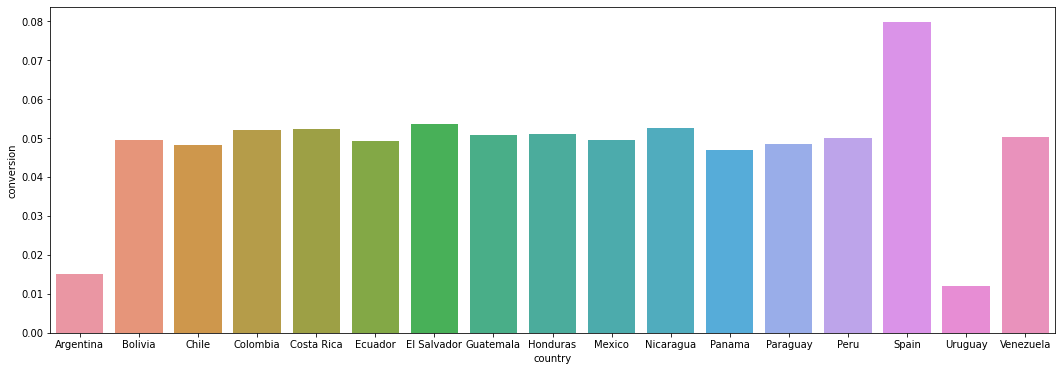

In [44]:
# Visualization of different countries
WO_test = df[df['test']==0]
conversion_rate = WO_test[['country', 'conversion','test']].groupby('country').mean().reset_index()

# Visualization
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', data=conversion_rate, ax=ax)
plt.show()

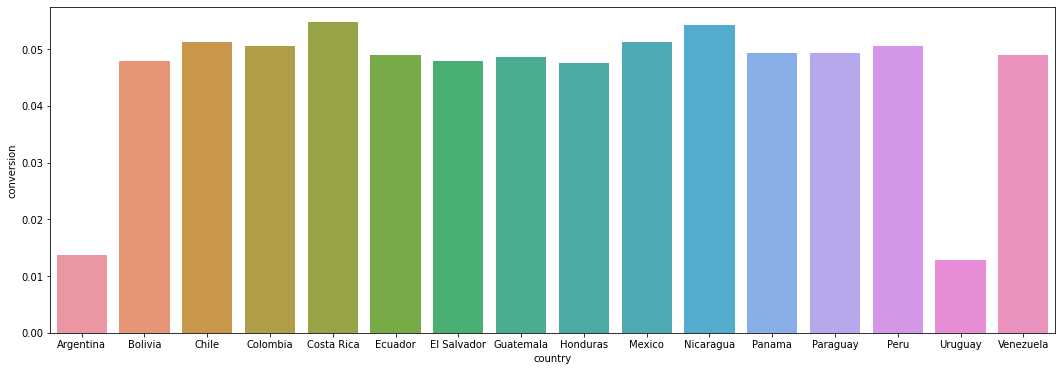

In [45]:
# Visualization
W_test = df[df['test']==1]
conversion_rate = W_test[['country', 'conversion','test']].groupby('country').mean().reset_index()

# Visualization
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', data=conversion_rate, ax=ax)
plt.show()

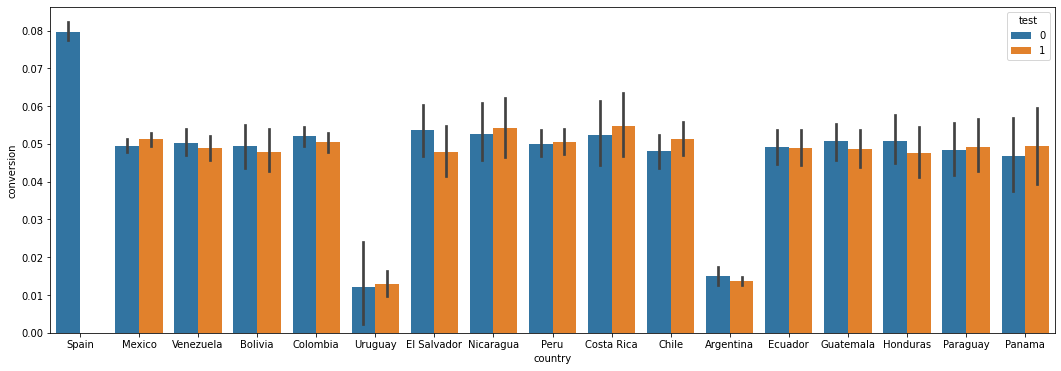

In [4]:
# Visualization
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', hue='test', data=df, ax=ax,estimator=np.mean)
plt.show()

In [ ]:
#A/B test to test if there is a significant difference 
WO_test = WO_test[WO_test['country'] != 'Spain']
W_test = W_test[W_test['country'] != 'Spain']

a = WO_test['conversion'].mean()
b = W_test['conversion'].mean()

answer to question 1

In [46]:
print(ttest_ind(W_test['conversion'],WO_test['conversion'], equal_var=False).pvalue)

1.0312099061277833e-74


pvalue is small, localized translations make it worse. 

Analysis

In [5]:
data = df[df['country']!='Spain']

In [6]:
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35,Mexico


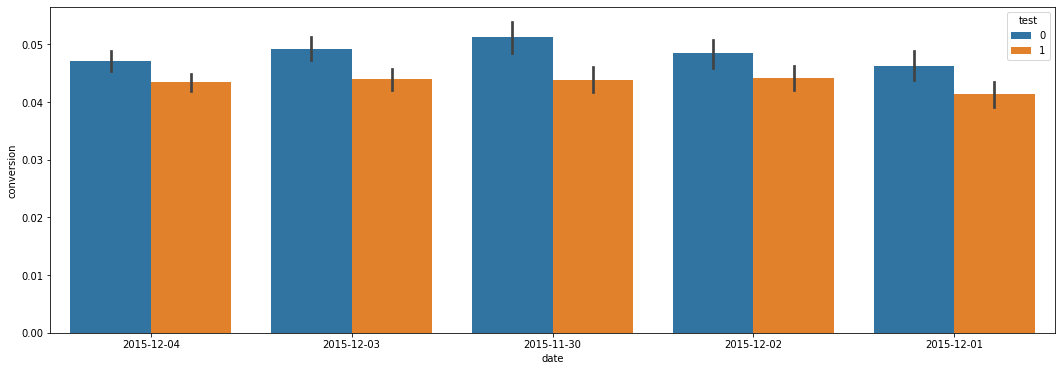

In [7]:
# Visualization of date versus conversion 
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='date', y='conversion', hue='test', data=data, ax=ax,estimator=np.mean)
plt.show()

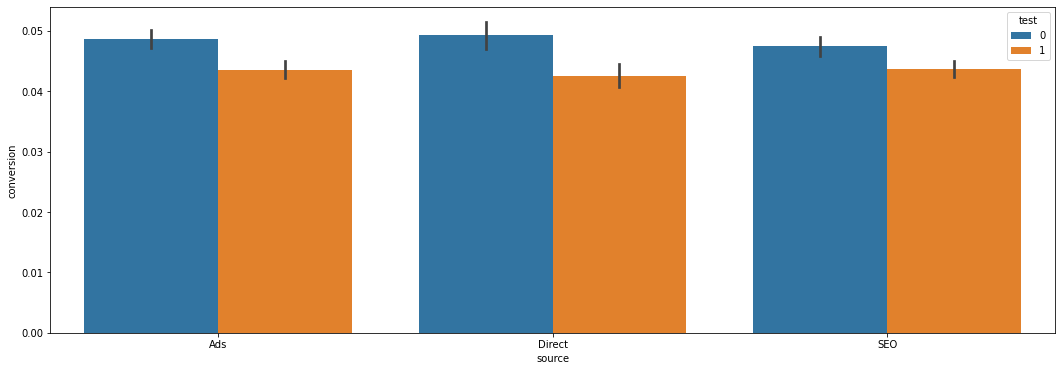

In [ ]:
# Visualization of source versus conversion 
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='source', y='conversion', hue='test', data=data, ax=ax,estimator=np.mean)
plt.show()

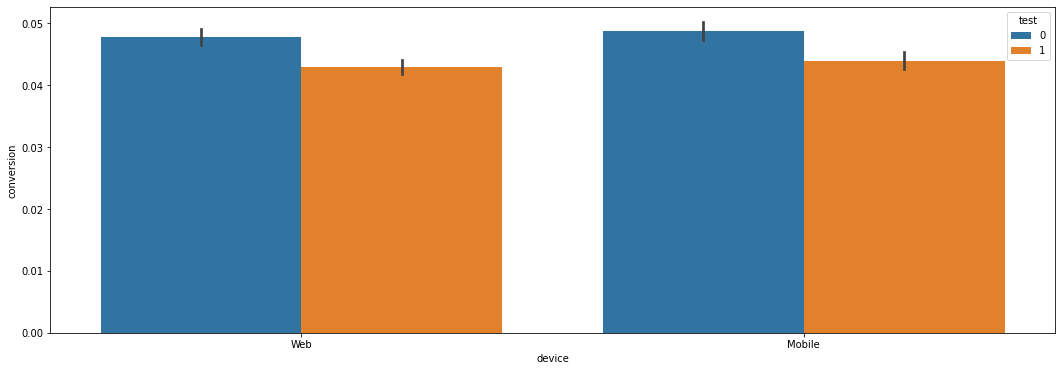

In [ ]:
# Visualization of device versus conversion 
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='device', y='conversion', hue='test', data=data, ax=ax,estimator=np.mean)
plt.show()

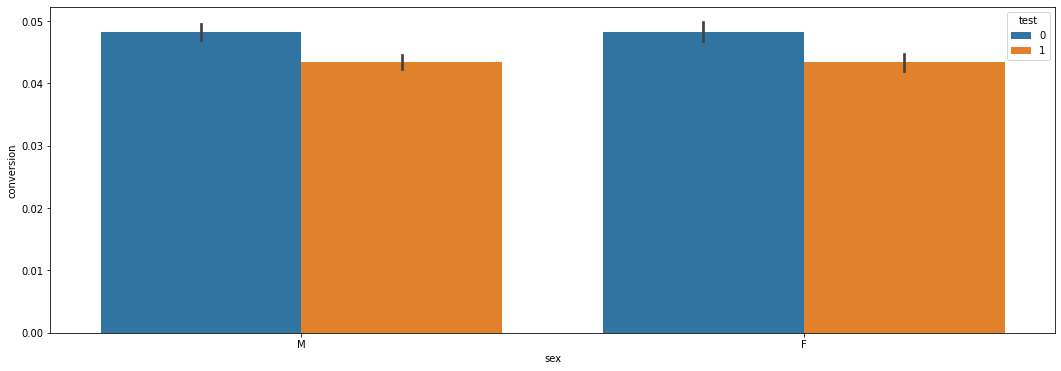

In [ ]:
# Visualization of sex versus conversion 
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='sex', y='conversion', hue='test', data=data, ax=ax,estimator=np.mean)
plt.show()

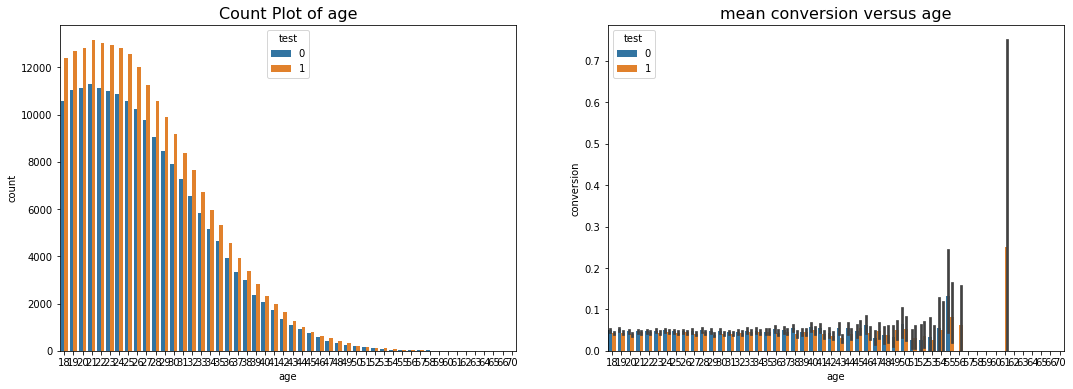

In [10]:
# Visualization of age versus conversion 
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18, 6))
sns.countplot(x='age', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of age', fontsize=16)

sns.barplot(x='age', y='conversion', hue='test', data=data, ax=ax[1],estimator=np.mean)
ax[1].set_title('mean conversion versus age', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Count Plot of Country')

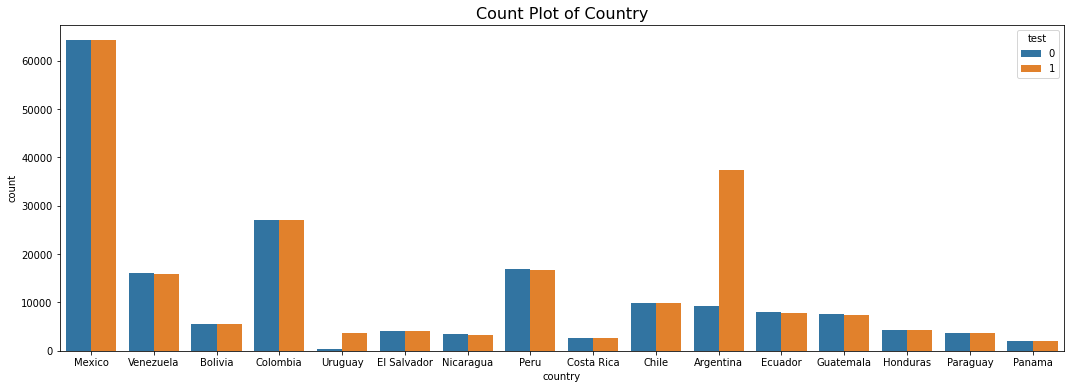

In [8]:
#visualize the number of sample with or without test in each country
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x='country', hue='test', data=data, ax=ax)
ax.set_title('Count Plot of Country', fontsize=16)

In [26]:
# Produce a summary dataframe, grouped by Country and test group with counts of each group:
sample_sizes = data[['country','test','conversion']].groupby(['country','test'], as_index=False).count()

# Produce a similar dataframe containing conversion ratios of each group:
conversions = data[['country','test','conversion']].groupby(['country','test'],as_index=False).sum()

# Merge dataframes, rename columns, re-index the new dataframe to have country column as index
summary = pd.merge(sample_sizes,conversions,on=['country','test'])
summary = summary.rename(columns={'conversion_x':'sample_size','conversion_y':'conversion'})


# Add a conversion ratio column, where the ratio = conversion/sample size
summary['conv_ratio'] = summary['conversion']/summary['sample_size']


In [51]:
countries = [name for name in summary['country'].unique()]
table = []
table.append(['country','test_mean', 'cont_mean', 'p_value'])
for name in countries:
  before_test = data[(data['country'] == name) & (data['test'] == 0)]['conversion'].values
  after_test = data[(data['country'] == name) & (data['test'] == 1)]['conversion'].values
  test_mean =  after_test.mean()
  cont_mean = before_test.mean()
  p_value = ttest_ind(after_test ,before_test, equal_var=False).pvalue
  print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(name, test_mean, cont_mean, p_value))
  table.append([name, test_mean, cont_mean, p_value])


Argentina               0.01373         0.01507   0.335147
Bolivia                 0.04790         0.04937   0.718885
Chile                   0.05130         0.04811   0.302848
Colombia                0.05057         0.05209   0.423719
Costa Rica              0.05474         0.05226   0.687876
Ecuador                 0.04899         0.04915   0.961512
El Salvador             0.04795         0.05355   0.248127
Guatemala               0.04865         0.05064   0.572107
Honduras                0.04754         0.05091   0.471463
Mexico                  0.05119         0.04949   0.165544
Nicaragua               0.05418         0.05265   0.780400
Panama                  0.04937         0.04680   0.705327
Paraguay                0.04923         0.04849   0.883697
Peru                    0.05060         0.04991   0.771953
Uruguay                 0.01291         0.01205   0.879764
Venezuela               0.04898         0.05034   0.573702


In [52]:
table

[['country', 'test_mean', 'cont_mean', 'p_value'],
 ['Argentina', 0.013725018059234288, 0.015070542967079948, 0.3351465468746866],
 ['Bolivia', 0.04790096878363832, 0.04936936936936937, 0.7188852468451075],
 ['Chile', 0.051295022258195065, 0.048107175479549374, 0.30284764308444695],
 ['Colombia', 0.05057096247960848, 0.052089486119314826, 0.4237190741314115],
 ['Costa Rica', 0.05473763684409211, 0.05225563909774436, 0.6878763537073986],
 ['Ecuador', 0.04898842091869195, 0.04915380786460926, 0.9615116906006622],
 ['El Salvador',
  0.04794688959921318,
  0.053554040895813046,
  0.2481266743266678],
 ['Guatemala', 0.04864720778355325, 0.05064287588559433, 0.5721072081912069],
 ['Honduras', 0.04753981459472308, 0.050905755560651224, 0.4714628565257586],
 ['Mexico', 0.05118630882924932, 0.04949461913438926, 0.16554372211039645],
 ['Nicaragua', 0.05417675544794189, 0.05264697279906405, 0.7804003858904794],
 ['Panama', 0.04937027707808564, 0.04679552390640895, 0.7053268372725889],
 ['Paraguay